# Summary

The dataset was provided by Tredence. It has 484042 rows and 27 columns.

This is a regression problem. The problem stated is a realistic one where the aim is to predict the 'Accident Risk Index' against the postcode on the test data which is given by:
  Accident Risk Index (mean casualties at a postcode) = sum
  (Number of casualities)/count(Accident_ID))

This can be useful for insurance firms as in order to pre-emptively plan for the losses, they can leverage accident data to understand the risk across the geographical units e.g. Postal code/district etc.

----

# Dataset Info:

Columns:

    'Accident_ID',
    'Police_Force',
    'Number_of_Vehicles',
    'Number_of_Casualties',
    'Date',
    'Day_of_Week',
    'Time',
    ‘Local_Authority_(District)',
    'Local_Authority_(Highway)',
    '1st_Road_Class',
    '1st_Road_Number',
    'Road_Type',
    'Speed_limit',
    '2nd_Road_Class',
    '2nd_Road_Number',
    'Pedestrian_Crossing-Human_Control',
    'Pedestrian_Crossing-Physical_Facilities',
    'Light_Conditions',
    ‘'Weather_Conditions',
    'Road_Surface_Conditions',
    'Special_Conditions_at_Site',
    'Carriageway_Hazards',
    'Urban_or_Rural_Area',
    'Did_Police_Officer_Attend_Scene_of_Accident',
    'state',
    'postcode',
    'country'

In [4]:
# Load Necessary Libraries

import os
import pandas as pd
import numpy as np
import copy
from datetime import datetime
import re
from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt
from numpy import concatenate
from sklearn.model_selection import StratifiedShuffleSplit

seed = 4

In [ ]:
sns.set_theme(context = 'notebook', style = 'whitegrid',
              palette = 'bright', 
              color_codes = True, font_scale = 1,
              rc = {'figure.figsize' : (10.0, 8.0)})

As our file size is large, we will use 'gdown' library to download file from google drive link using our sharelink id.

Note: If url is used inplace of 'id', it won't work for large files.

In [1]:
import gdown

In [10]:
# downloading file using sharlink id
!gdown 1RbU2Mex8wfhyhKVHB8YVFI4f89Nhty6z

Downloading...
From: https://drive.google.com/uc?id=1RbU2Mex8wfhyhKVHB8YVFI4f89Nhty6z
To: /content/train.csv
100% 118M/118M [00:00<00:00, 133MB/s]


In [5]:
df = pd.read_csv('train.csv')

In [6]:
df.head()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Daylight: Street light present,Fine without high winds,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Daylight: Street light present,Raining without high winds,Dry,None,None,1,No,England,S35 4EZ,United Kingdom
2,3,1,2,1,02/11/12,4,16:00,531,E10000016,6,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,BN21 2XR,United Kingdom
3,4,1,1,1,06/05/12,1,16:50,7,E08000035,6,...,Daylight: Street light present,Fine without high winds,Dry,Roadworks,None,1,Yes,England,TA20 3PT,United Kingdom
4,5,46,1,1,30/06/12,3,13:25,519,E10000031,3,...,Daylight: Street light present,Fine without high winds,Dry,None,None,1,No,England,DN20 0QF,United Kingdom


In [ ]:
df.shape

(478741, 27)

# Check Data Integrity and Basic Univariate Statistics


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478741 entries, 0 to 478740
Data columns (total 27 columns):
 #   Column                                       Non-Null Count   Dtype 
---  ------                                       --------------   ----- 
 0   Accident_ID                                  478741 non-null  int64 
 1   Police_Force                                 478741 non-null  int64 
 2   Number_of_Vehicles                           478741 non-null  int64 
 3   Number_of_Casualties                         478741 non-null  int64 
 4   Date                                         478741 non-null  object
 5   Day_of_Week                                  478741 non-null  int64 
 6   Time                                         478727 non-null  object
 7   Local_Authority_(District)                   478741 non-null  int64 
 8   Local_Authority_(Highway)                    478741 non-null  object
 9   1st_Road_Class                               478741 non-null  int64 
 

Local_Authority_(District), Road Class and Road Number(1st and 2nd) are categorical data types but are casted as integer data types

In [ ]:
df.describe()

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area
count,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.000000,478741.0,478741.000000
mean,299892.954673,31.610178,1.745695,1.463528,4.367898,357.457132,4.381542,946.663375,37.035976,2.430068,0.0,1.402050
std,173261.274950,24.941660,0.626458,0.816019,1.872983,256.530105,1.369579,1730.926876,12.854299,3.268563,0.0,0.490313
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,0.0,1.000000
25%,149718.000000,12.000000,1.000000,1.000000,3.000000,103.000000,3.000000,10.000000,30.000000,-1.000000,0.0,1.000000
50%,299791.000000,33.000000,2.000000,1.000000,5.000000,314.000000,4.000000,336.000000,30.000000,3.000000,0.0,1.000000
75%,449990.000000,45.000000,2.000000,2.000000,6.000000,521.000000,6.000000,569.000000,40.000000,6.000000,0.0,2.000000
max,599999.000000,98.000000,4.000000,5.000000,7.000000,941.000000,6.000000,9832.000000,70.000000,6.000000,0.0,2.000000


All min-max values seemto be in range.

Note: 2nd_Road_Class minimum value is -1, however since it is of categorical type it wouldn't affect our analysis


In [ ]:
df.describe(include = object)

,Date,Time,Local_Authority_(Highway),Road_Type,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country
count,478741,478727,478741,478741,478741,478741,478741,478741,478289,478678,478741,478741,478741,478741,478741
unique,366,1367,207,6,3,6,5,9,5,8,6,2,3,95625,1
top,23/02/12,16:00,E10000016,Single carriageway,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,Yes,England,OX20 1TE,United Kingdom
freq,5390,6848,31297,372554,455040,404561,377728,379429,365843,427839,459559,391064,407853,29,478741


In [ ]:
df[df.Accident_ID.duplicated()]

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country


No duplicate rows found

# Splitting the Data

To avoid data leakage we will split our dataset into train and test sets.

Even though this is a regression problem, the desired variable that we need to calculate and predict i.e. Accident Risk Index depends on 'postcode' and 'number of casualties' and thus we should try to split our dataset in way so as to preserve the relative distribution of the these mentioned variables if possible.

Note: 'Postcode' is a categorical variable and 'Number of Casualties' is a discrete numeric variable that should follow Poisson distribution.


We will first check the frequency of all categories of variable 'postcode' .

Note: 
* Frequency of 1 cannot be stratified split and would require removing and adding them manually to train data set or creating synthetic/duplicate sample. 
* If a lot of categories have frequency of 1 it wouldn't make sense to stratify split across variable 'postcode' then 


In [ ]:
np.sum(df['postcode'].value_counts() == 1)

15838

We observe thata lots of categories of  variable 'postcode' is 1.

We will try to see if we can group them together in some way to increase their respective group frequencies.

In [ ]:
df['postcode'].sort_values().head(10)

319229    AB10 1AU
266991    AB10 1AU
160721    AB10 1AU
24413     AB10 1AU
345862    AB10 1BD
273646    AB10 1BD
358464    AB10 1BD
66192     AB10 1BD
210610    AB10 1BD
407745    AB10 1BW
Name: postcode, dtype: object

Notice how the categories of 'postcode' are named. 
It seems like the first part represents the main area and and second part its subdivisions.

We will now split their names into 2 and see their frequency with respect to the first parts grouped  

In [ ]:
postcode_split = df['postcode'].str.split(' ', 1, expand = True)

In [ ]:
df_postcode_split = copy.deepcopy(df)

In [ ]:
df_postcode_split[['postcode_start','postcode_end']] \
                 = df_postcode_split['postcode'].str.split(' ', 1, expand = True)

In [ ]:
df_postcode_split.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,...,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,postcode_start,postcode_end
0,1,34,2,1,19/12/12,7,13:20,344,E10000032,4,...,Dry,Ol or diesel,None,1,Yes,England,OX3 9UP,United Kingdom,OX3,9UP
1,2,5,2,1,02/11/12,4,7:53,102,E09000026,3,...,Dry,None,None,1,No,England,S35 4EZ,United Kingdom,S35,4EZ


In [ ]:
df_postcode_split['postcode_start'].value_counts()

CR0     1643
NW10    1086
PR1     1067
N1      1065
E1      1054
        ... 
LL51       1
KW2        1
IV56       1
PA35       1
DL98       1
Name: postcode_start, Length: 2689, dtype: int64

In [ ]:
sum(df_postcode_split['postcode_start'].value_counts() == 1)

18

After grouping we have greatly reduced the number of categories with frequency 1.

However, for the sake of berevity and simplicity we will ignore to stratify split our dataset with respect to postcode.

We will now check distribution of 'number of casualties'

In [ ]:
df['Number_of_Casualties'].value_counts(normalize = True) * 100

1    68.747820
2    20.640388
3     7.394186
4     1.946355
5     1.271251
Name: Number_of_Casualties, dtype: float64

We notice the outcome variable is heavily unbalanced and thus will split it using stratified shuffle split

## Stratified Shuffle Split

In [ ]:
features = df.drop(columns = ['Number_of_Casualties']).columns

In [ ]:
strat_shuf_split = StratifiedShuffleSplit(n_splits = 1, 
                                          test_size = 0.3, 
                                          random_state = seed)

train_idx, test_idx = next(strat_shuf_split.split(df[features], df.Number_of_Casualties))

# Create the dataframes
X_train = df.loc[train_idx, features]
y_train = df.loc[train_idx, 'Number_of_Casualties']

X_test  = df.loc[test_idx, features]
y_test  = df.loc[test_idx, 'Number_of_Casualties']

len(X_train), len(X_test)

(335118, 143623)

In [ ]:
# Joining explanatory and outcome data to make it easier for us to perform EDA

Xy_train = pd.concat([X_train, y_train], axis = 1)
Xy_test = pd.concat([X_test, y_test], axis = 1)

In [ ]:
Xy_train.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Date,Day_of_Week,Time,Local_Authority_(District),Local_Authority_(Highway),1st_Road_Class,1st_Road_Number,...,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,state,postcode,country,Number_of_Casualties
243476,304977,33,2,01/10/12,6,13:50,345,E10000007,5,3,...,Fine without high winds,Dry,None,None,2,No,England,IP17 1JX,United Kingdom,1
282489,353807,16,1,20/04/12,4,19:00,93,E10000006,6,24,...,Fine without high winds,Dry,None,None,1,Yes,England,SO17 2HS,United Kingdom,1


In [ ]:
# Resetting index after shuffle split 

Xy_train = Xy_train.reset_index(drop = True)
Xy_test = Xy_test.reset_index(drop = True)

In [ ]:
Xy_train['Number_of_Casualties'].value_counts(normalize = True) * 100 

1    68.747725
2    20.640491
3     7.394112
4     1.946479
5     1.271194
Name: Number_of_Casualties, dtype: float64

# Feature Engineering
#### Creating New Features and Removing Unnecessary Columns

In [ ]:
df.nunique()

Accident_ID                                    478741
Police_Force                                       66
Number_of_Vehicles                                  4
Number_of_Casualties                                5
Date                                              366
Day_of_Week                                         7
Time                                             1367
Local_Authority_(District)                        880
Local_Authority_(Highway)                         207
1st_Road_Class                                      5
1st_Road_Number                                  5464
Road_Type                                           6
Speed_limit                                         6
2nd_Road_Class                                      5
2nd_Road_Number                                     1
Pedestrian_Crossing-Human_Control                   3
Pedestrian_Crossing-Physical_Facilities             6
Light_Conditions                                    5
Weather_Conditions          

In [ ]:
def value_precentage(data, data_col):
  size = data.shape[0]
  for col in data_col:
    print((data[col].value_counts()/size) * 100)
    print('\n')

All variables are either discrete(numeric) or categorical in nature, so we will check value counts to see if they have any variation and thus being useful for analysis

Note: A categorical variable isn't useful for analysis when it has the same single value throughout or a different/unique value for almsot all rows (very low percentage/frequency of all its categories).

In [ ]:
value_precentage(Xy_train, Xy_train.columns[1:])

1     10.039150
43     8.926408
5      6.820583
21     6.230044
6      5.217565
        ...    
56     0.000597
2      0.000597
18     0.000597
39     0.000298
29     0.000298
Name: Police_Force, Length: 65, dtype: float64


2    58.778997
1    34.101719
3     5.616529
4     1.502754
Name: Number_of_Vehicles, dtype: float64


23/02/12    1.130050
17/01/12    1.100508
19/01/12    1.042319
28/01/12    0.962049
24/02/12    0.954589
              ...   
10/06/12    0.026856
28/10/12    0.026558
05/08/12    0.024469
16/09/12    0.023872
13/08/12    0.022380
Name: Date, Length: 366, dtype: float64


6    21.082126
3    20.227204
5    15.186591
7    14.835670
2    12.051874
4     9.616911
1     6.999624
Name: Day_of_Week, dtype: float64


16:00    1.402193
18:00    1.086185
15:30    1.034263
13:20    0.940863
18:50    0.928031
           ...   
3:48     0.000298
0:32     0.000298
5:31     0.000298
4:38     0.000298
6:31     0.000298
Name: Time, Length: 1349, dtype: float64


24     1.042021
2

We can remove variables 'country' and '2nd_Road_Number' as they have same value across all rows

In [ ]:
def remove_columns(data, col):
  data = copy.deepcopy(data)
  return data.drop(columns = col)

In [ ]:
Xy_train = remove_columns(Xy_train, ['country', '2nd_Road_Number'])
Xy_test = remove_columns(Xy_test, ['country', '2nd_Road_Number'])

We observe Local_Authority_(District), Local_Authority_(Highway), '1st_Road_Number', 'Date' and 'Time' have very low percentage across all their categories.

Before we decide on removing them, we should see if they can be further subgrouped to create a new feature and thus be useful.

Note: 
  * 'Date' and 'Time' are considered as special 
  categories in time series data i.e. where time 
  correlation is relevant. Here, since we aren't 
  concerned with correlation with respect to time 
  we will consider them as normal categorical data 
  types.

  * Before creating new features we should check 
  if there are any missing values in that columns 
  itself and treat them first as there can be loss 
  of some information when creating new features.

In [ ]:
df[['Local_Authority_(District)', 'Local_Authority_(Highway)', 
   '1st_Road_Number', 'Date', 'Time']].isnull().sum()

Local_Authority_(District)     0
Local_Authority_(Highway)      0
1st_Road_Number                0
Date                           0
Time                          14
dtype: int64

We observe 'Time' has some missing values that would need to be treated first

---

'Local_Authority_(Highway)' can be grouped by the initial letter its name begins with (Its name begins with a letter, followed by digits).

'Date' can be useful as we can extract new features from it such as day of month, month, year etc

Also 'Time' can be subgrouped into day and night or day, afternoon, evening and night.

However, for Local_Authority_(District) and '1st_Road_Number' we aren't sure on how we can further group them and thus we can remove them.

---

### New Feature - LA_Highway_Grouped

In [ ]:
highway_grouped_train = Xy_train['Local_Authority_(Highway)'].str.split('', n = 2, expand = True)
highway_grouped_test = Xy_test['Local_Authority_(Highway)'].str.split('', n = 2, expand = True)

In [ ]:
highway_grouped_train[1].value_counts()

E    295196
S     23126
W     16796
Name: 1, dtype: int64

In [ ]:
Xy_train['LA_Highway_Grouped'] = highway_grouped_train[1]
Xy_test['LA_Highway_Grouped'] = highway_grouped_test[1]

'Date' can be used together with 'Time' variable as together they can be converted to datetime format type and thus we will perform feature engineering on both of them later after treatment of missing values for 'Time'

In [ ]:
Xy_train = remove_columns(Xy_train, ['Local_Authority_(District)', 'Local_Authority_(Highway)',
                                     '1st_Road_Number'])
Xy_test = remove_columns(Xy_test, ['Local_Authority_(District)', 'Local_Authority_(Highway)',
                                     '1st_Road_Number'])

# Exploratory Data Analysis

We can further subdivide our columns into - numeric, binary and categorical(more than 2) and save them as variables

In [ ]:
Xy_train.columns

Index(['Accident_ID', 'Police_Force', 'Number_of_Vehicles', 'Date',
       'Day_of_Week', 'Time', '1st_Road_Class', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'state', 'postcode', 'Number_of_Casualties', 'LA_Highway_Grouped'],
      dtype='object')

In [ ]:
date_col = ['Date', 'Day_of_Week', 'Time']

num_col = ['Police_Force', 'Number_of_Vehicles', 'Number_of_Casualties', 'Speed_limit']

cat_col = ['Road_Type', 'Pedestrian_Crossing-Human_Control',
           'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
           'Weather_Conditions', 'Road_Surface_Conditions',
           'Special_Conditions_at_Site', 'Carriageway_Hazards',
           'Did_Police_Officer_Attend_Scene_of_Accident', 'state',
           'LA_Highway_Grouped']

# columns classified wrongly as numerical type  
misc_cat_col = ['1st_Road_Class', '2nd_Road_Class', 'Urban_or_Rural_Area']

all_cat_col = cat_col + misc_cat_col

In [ ]:
bin_col = Xy_train[all_cat_col].loc[:, Xy_train[all_cat_col].nunique() == 2].columns.values

mul_col = Xy_train[all_cat_col].loc[:, Xy_train[all_cat_col].nunique() > 2].columns.values

## Plotting and Tests

We'll use the ANOVA test to understand the correlation between categorical variables and response variable 'Number of Casualties'. 
(ANOVA test is a statistical technique used to determine if there exists a significant difference in the mean of groups)

While using ANOVA, our hypothesis is as follows:

Ho - There exists no significant difference between the groups. 
Ha - There exists a significant difference between the groups.

We will define a function which calculates p values. From those p values, we'll calculate a disparity score. Higher the disparity score, better the feature in predicting 'Number of Casualties'. 

* Note: ANOVA tests require its assumptions to be met, failure of which will make our results of hypothesis tests and confidence intervals inaccurate. Here, for the sake of demonstration, I am assuming that its assumptions are met. If the assumptions are not met we use other robust tests and/or methods like transformations, resampling etc

### ANOVA

In [ ]:
def anova(df, cat_col, response):
    cat_df = df.loc[:, cat_col] 
    cat_df[response] = df[response].values
    anv = pd.DataFrame()
    anv['features'] = cat_col
    pvals = []
    for c in all_cat_col:
           samples = []
           for cls in cat_df[c].unique():
                  s = cat_df[cat_df[c] == cls][response].values
                  samples.append(s)
           pval = stats.f_oneway(*samples)[1]
           pvals.append(pval)
    anv['pval'] = pvals
    return anv.sort_values('pval')

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


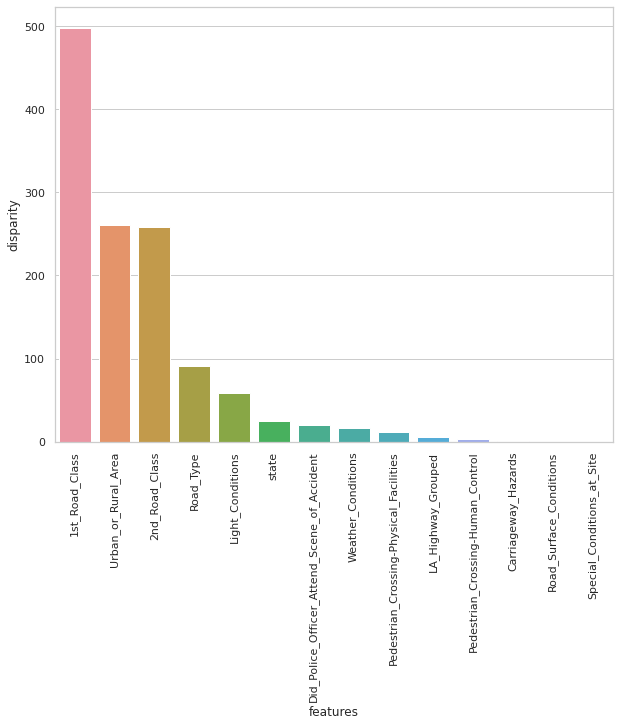

In [ ]:
k = anova(Xy_train, all_cat_col, 'Number_of_Casualties') 
k['disparity'] = np.log(1./k['pval'].values) 
sns.barplot(data = k, x = 'features', y = 'disparity') 
plt.xticks(rotation = 90) 
plt.show()

Here we see that among all categorical variables '1st_Road_Class' is the most important feature followed by 'Urban_or_Rural_Area, '2nd_Road_Class' etc. It shows that accidents are releated to traffic densities, depend area to area, conditions of roads, light conditions etc.

## Histogram

Next we will plot histograms for all numeric variables to determine if all variables are skewed.

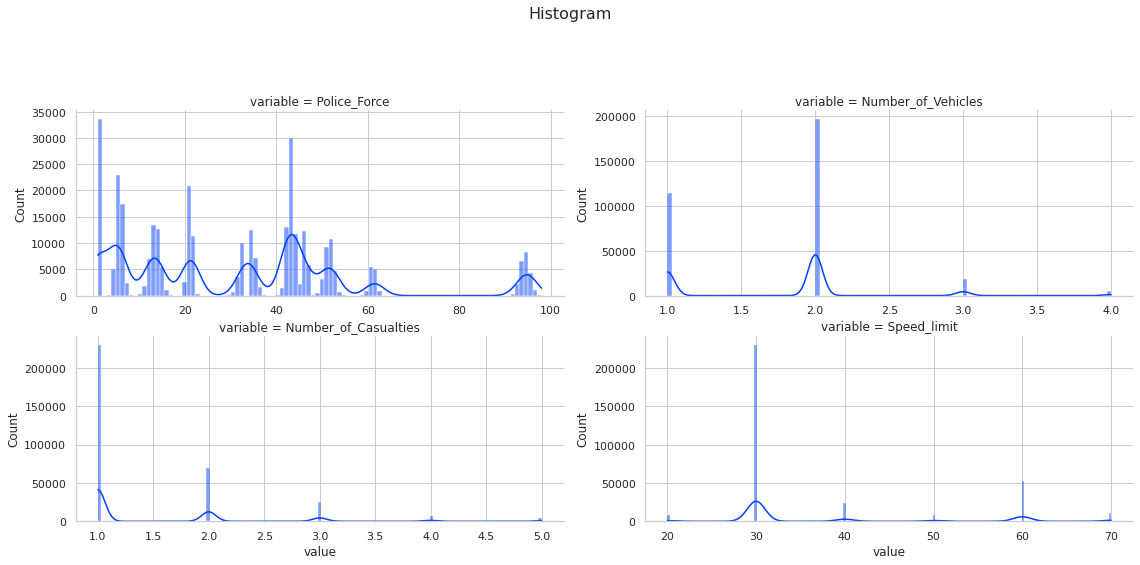

In [ ]:
#create numeric plots
nd = pd.melt(Xy_train, value_vars = num_col)
g = sns.FacetGrid (nd, col = 'variable', col_wrap = 2, 
                    sharex = False, sharey = False,
                    height = 4, aspect = 2)
g = g.map(sns.histplot, 'value', kde = True)
g.fig.subplots_adjust(top = 0.8)
g.fig.suptitle("Histogram", fontsize = 16)
g
plt.show()

## Bar Plots

Now, for Categorical variables, we will use bar plots and count plots to check their relationship with respect to mean of 'Number of Casualties' and also subdivided across 'Number of Casualties'.
Also, we will use violin plots to check their distribution

In [ ]:
cat = Xy_train.columns[Xy_train.nunique() < 15]

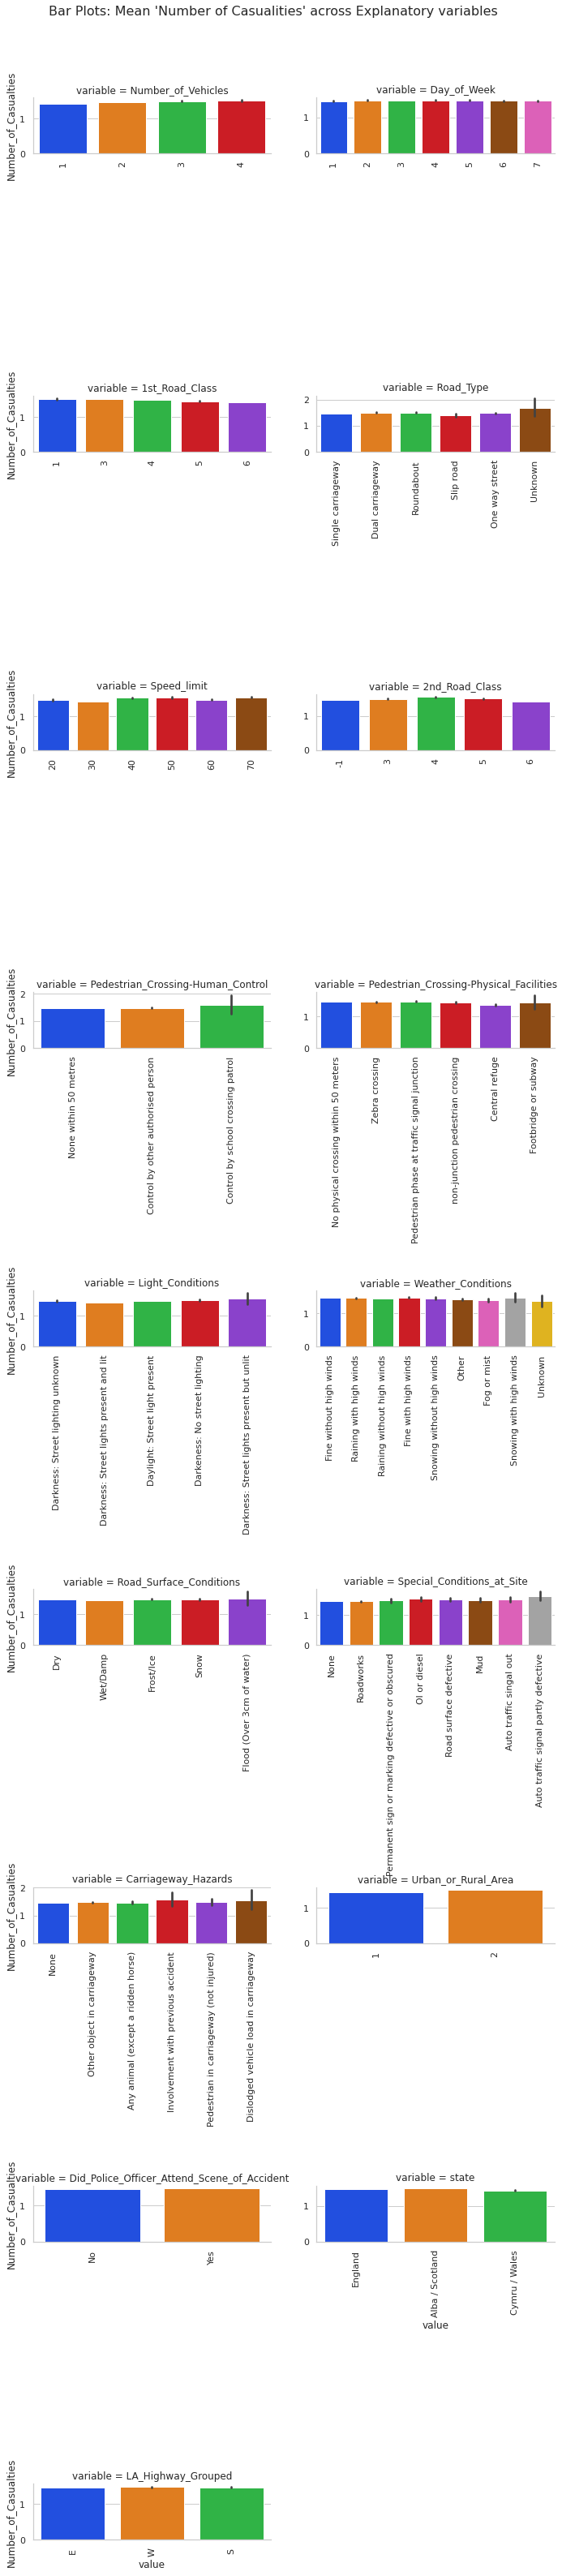

In [ ]:
def barplot(x, y, **kwargs):
            sns.barplot(x = x, y = y)
            x = plt.xticks(rotation = 90)

p = pd.melt(Xy_train, id_vars = 'Number_of_Casualties', value_vars = cat)
g = sns.FacetGrid(p, col = 'variable', col_wrap = 2, sharex = False, 
                  sharey = False, height = 5)
g = g.map(barplot, 'value', 'Number_of_Casualties')
g.fig.subplots_adjust(top = 0.945)
g.fig.suptitle("Bar Plots: Mean 'Number of Casualities' across Explanatory variables",
               fontsize = 16)
g
plt.show()

## Count Plots

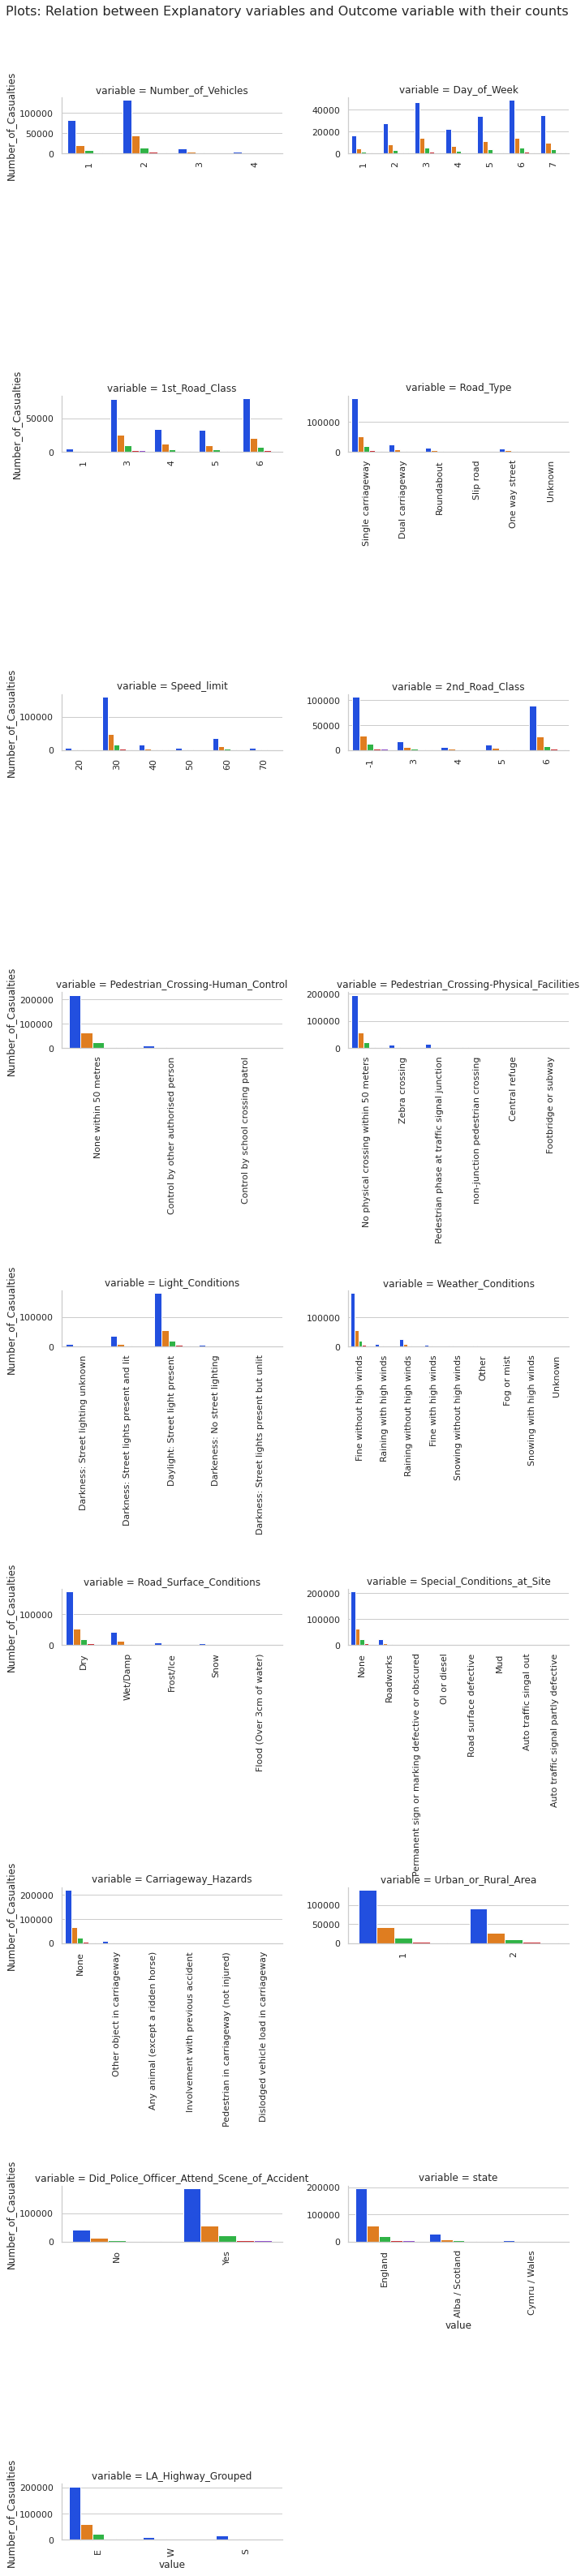

In [ ]:
def countplot(x, y, **kwargs):
            sns.countplot(x = x, hue = y)
            x = plt.xticks(rotation = 90)

p = pd.melt(Xy_train, id_vars = 'Number_of_Casualties', value_vars = cat)
g = sns.FacetGrid(p, col = 'variable', col_wrap = 2, sharex = False, 
                  sharey = False, height = 5)
g = g.map(countplot, 'value', 'Number_of_Casualties')
g.fig.subplots_adjust(top = 0.945)
g.fig.suptitle('Plots: Relation between Explanatory variables and Outcome variable with their counts',
               fontsize = 16)
g
plt.show()

## Violin Plots

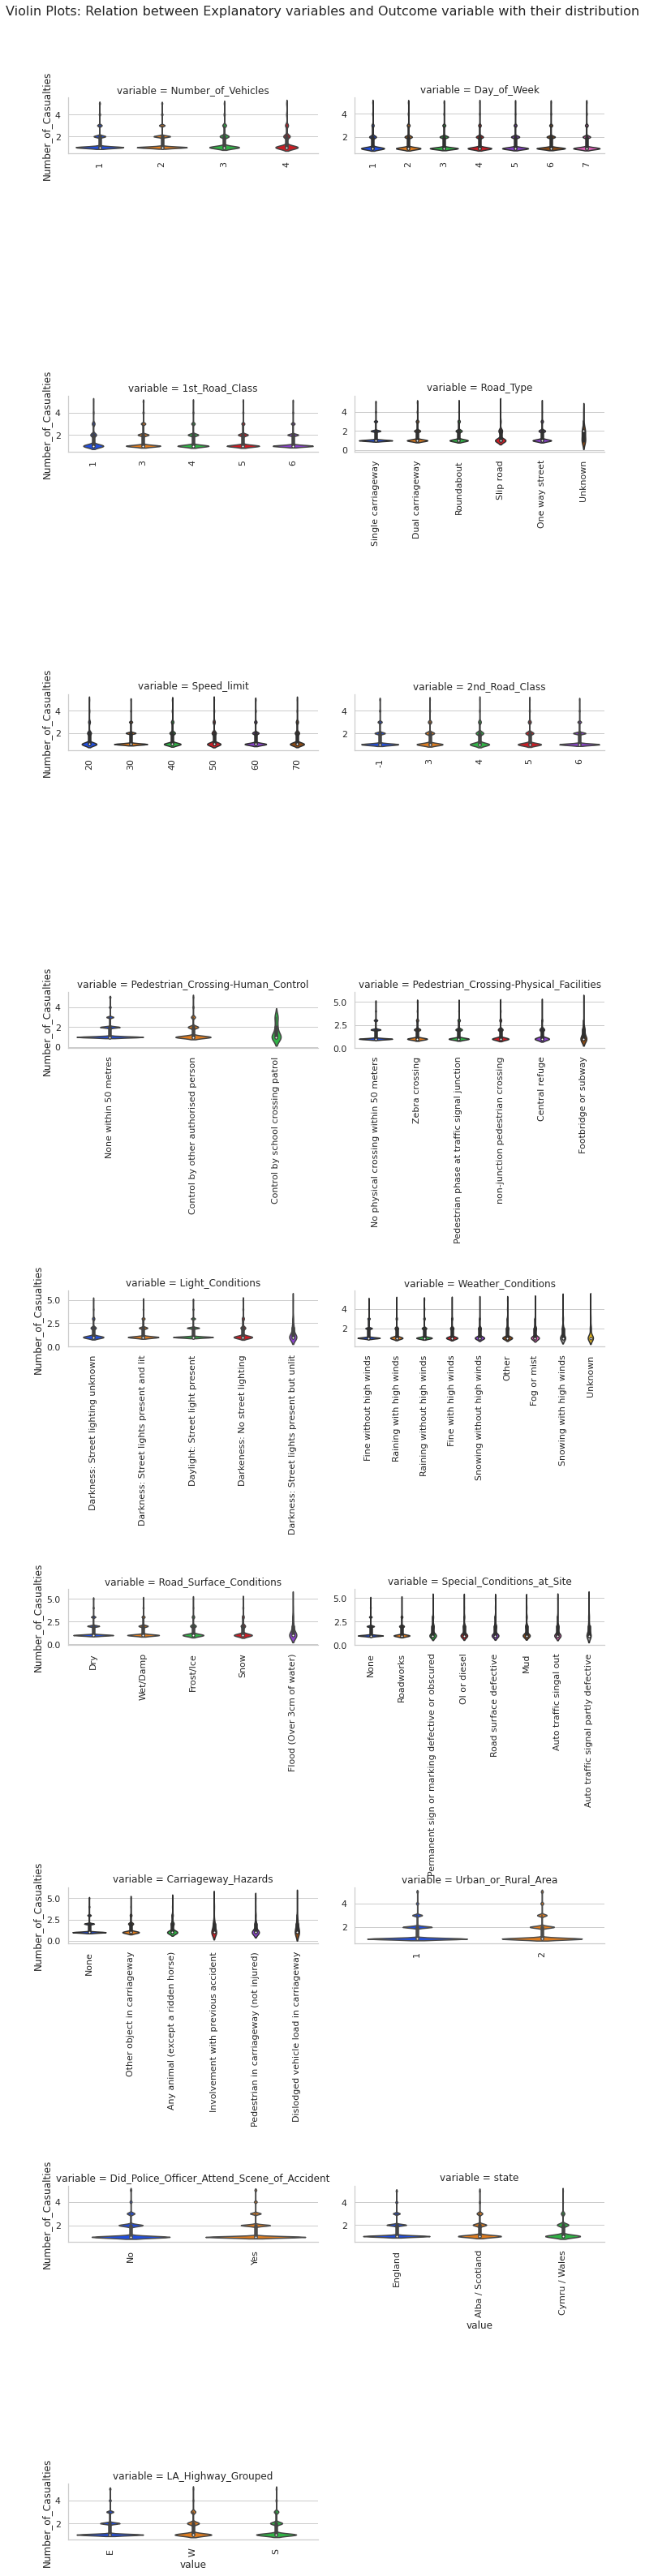

In [ ]:
def violinplot(x, y, **kwargs):
            sns.violinplot(x = x, y = y)
            x = plt.xticks(rotation = 90)

p = pd.melt(Xy_train, id_vars = 'Number_of_Casualties', value_vars = cat)
g = sns.FacetGrid(p, col = 'variable', col_wrap = 2, sharex = False, 
                  sharey = False, height = 5)
g = g.map(violinplot, 'value', 'Number_of_Casualties')
g.fig.subplots_adjust(top = 0.945)
g.fig.suptitle('Violin Plots: Relation between Explanatory variables and Outcome variable with their distribution',
               fontsize = 16)
g
plt.show()

### Other Plots

We can further investigate the mean of 'Number of Casualties' based on  interaction of 2 categories or more.
Here, we demonstrate how 'Road Type' and 'Pedestrian Crossion - Human Control' together combined affect the mean value of 'Number of Casualties'

In [ ]:
pivot = Xy_train.pivot_table(index = ['Road_Type', 'Pedestrian_Crossing-Human_Control'], 
                             values = 'Number_of_Casualties', 
                             aggfunc = np.mean)
pivot

Number_of_Casualties
Road_Type          Pedestrian_Crossing-Human_Control                       
Dual carriageway   Control by other authorised person              1.564790
                   Control by school crossing patrol               2.000000
                   None within 50 metres                           1.500198
One way street     Control by other authorised person              1.518318
                   Control by school crossing patrol               2.000000
                   None within 50 metres                           1.486045
Roundabout         Control by other authorised person              1.513078
                   Control by school crossing patrol               1.000000
                   None within 50 metres                           1.502853
Single carriageway Control by other authorised person              1.462163
                   Control by school crossing patrol               1.562500
                   None within 50 metres                           1.452866
Slip road          Control by other authorised person              1.625000
                   None within 50 metres                           1.393352
Unknown            None within 50 metres                           1.684211

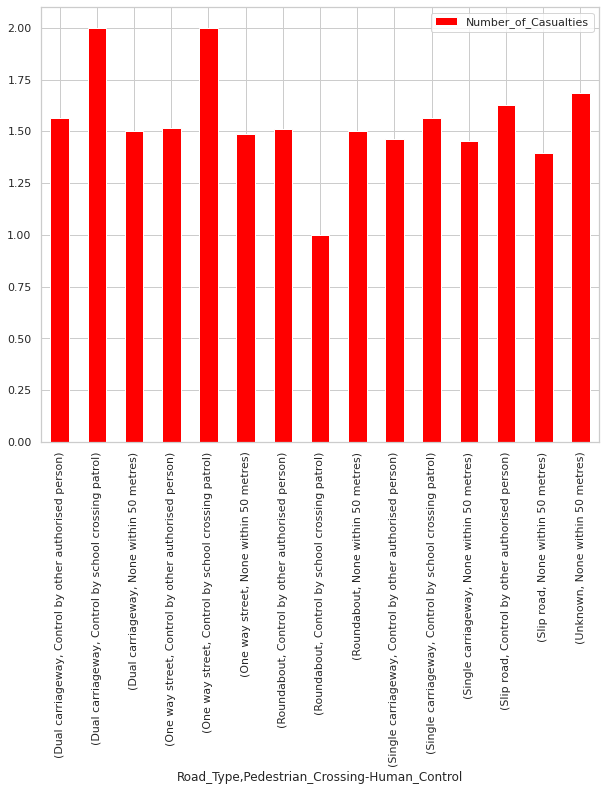

In [ ]:
pivot.plot(kind='bar', color = 'red')
plt.show()

# Treating Missing Values

In [ ]:
(Xy_train.isnull().sum()/Xy_train.shape[0]) * 100

Accident_ID                                    0.000000
Police_Force                                   0.000000
Number_of_Vehicles                             0.000000
Date                                           0.000000
Day_of_Week                                    0.000000
Time                                           0.003879
1st_Road_Class                                 0.000000
Road_Type                                      0.000000
Speed_limit                                    0.000000
2nd_Road_Class                                 0.000000
Pedestrian_Crossing-Human_Control              0.000000
Pedestrian_Crossing-Physical_Facilities        0.000000
Light_Conditions                               0.000000
Weather_Conditions                             0.000000
Road_Surface_Conditions                        0.093997
Special_Conditions_at_Site                     0.013727
Carriageway_Hazards                            0.000000
Urban_or_Rural_Area                            0

We see 'Time', 'Road_Surface_Conditions' and 'Special_Conditions_at_Site' variables have missing values

We will first treat missing values of variables 'Road_Surface_Conditions' and 'Special_Conditions_at_Site' 

There are several methods to fix missing values Here we will be replacing missing values with a new category type 'missing'.

In [ ]:
def fill_missing(data, column):
  data = copy.deepcopy(data)  
  data[column] = data[column].fillna('missing')
  return data

In [ ]:
# Fill missing value

Xy_train = fill_missing(Xy_train, ['Road_Surface_Conditions', 'Special_Conditions_at_Site'])
Xy_test = fill_missing(Xy_test, ['Road_Surface_Conditions', 'Special_Conditions_at_Site'])

In [ ]:
Xy_train[mul_col].isnull().sum()

Road_Type                                  0
Pedestrian_Crossing-Human_Control          0
Pedestrian_Crossing-Physical_Facilities    0
Light_Conditions                           0
Weather_Conditions                         0
Road_Surface_Conditions                    0
Special_Conditions_at_Site                 0
Carriageway_Hazards                        0
state                                      0
LA_Highway_Grouped                         0
1st_Road_Class                             0
2nd_Road_Class                             0
dtype: int64

For missing 'time' values, lets check what are the values its related corresponding values

In [ ]:
Xy_train.loc[Xy_train['Time'].isnull(), 
             ['Date', 'Light_Conditions', 'state', 'Number_of_Casualties']]

,Date,Light_Conditions,state,Number_of_Casualties
34244,08/11/12,Daylight: Street light present,England,3
72000,03/11/12,Daylight: Street light present,Cymru / Wales,1
91413,13/11/12,Darkness: Street lighting unknown,England,1
137281,09/04/12,Daylight: Street light present,England,2
139106,03/02/12,Daylight: Street light present,Alba / Scotland,1
146274,20/07/12,Daylight: Street light present,Alba / Scotland,1
149385,04/04/12,Daylight: Street light present,England,2
230757,30/12/12,Daylight: Street light present,England,1
263112,28/07/12,Daylight: Street light present,England,2
267589,17/01/12,Daylight: Street light present,England,1


We can estimate its missing values from state of 'Daylight' or 'Darkness', month and country

In [ ]:
Xy_train.loc[Xy_train['Light_Conditions'] \
             == 'Daylight: Street light present', 
             'Time'].str.split(":", expand = True)[0].dropna().astype(int).sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

We observe that range of 'hour' value for daytime is the whole day which isn't plausible. We can further subgroup month wise, check and confirm the same but for the sake of berivity we will leave it be and thus will believe that this is a computer generated dataset and hence considering any real life relation to other variables would be pointless.

Thus for imputing time values we can either use random values or we can try to correspond the values with number of casualties and take the mean/mode value thus keeping the structure/distribution of data intact

In [ ]:
Xy_train['Time'].str.split(":", expand = True)[0].dropna().astype(int).mean() 

13.850354366541831

In [ ]:
print('Number_of_Casualties-1')
print(Xy_train.loc[Xy_train['Number_of_Casualties'] == 1, 
             'Time'].str.split(":", expand = True)[0].dropna().astype(int).mean())

print('\nNumber_of_Casualties-2')
print(Xy_train.loc[Xy_train['Number_of_Casualties'] == 2, 
             'Time'].str.split(":", expand = True)[0].dropna().astype(int).mean())

print('\nNumber_of_Casualties-3')
print(Xy_train.loc[Xy_train['Number_of_Casualties'] == 3, 
             'Time'].str.split(":", expand = True)[0].dropna().astype(int).mean())

Number_of_Casualties-1
13.850728582032216

Number_of_Casualties-2
13.845977011494252

Number_of_Casualties-3
13.864072967955444


The mean value of time is equally distributed across number of casualties

### Fill Missing Time Value

In [ ]:
# Fill missing time

Xy_train['Time'] = Xy_train['Time'].fillna("13:50")
Xy_test['Time'] = Xy_test['Time'].fillna("13:50")

In [ ]:
print('Train Missing Values: %d' % Xy_train.isnull().sum().sum())
print('Test Missing Values: %d' % Xy_test.isnull().sum().sum())

Train Missing Values: 0
Test Missing Values: 0


# Feature Engineering

After filling missing value for time, we can continue with extraction of new features from 'Date' and 'Time' as discussed earlier

### New Feature - Month, Part_of_Day

In [ ]:
def join_date_time(data):
  data = copy.deepcopy(data)
  data['Date_Time'] = pd.to_datetime(data['Date'] + data['Time'], 
                                     format='%d/%m/%y%H:%M', errors = 'ignore')
  data = data.drop(columns = ['Date', 'Time'])
  return data

In [ ]:
def prepare_date_time(data):

  data = join_date_time(data)

  # binning time as per part of the day
  hour_min = (data['Date_Time'] - pd.Timedelta(hours = 5)).dt.hour
  hour_cat = pd.cut(include_lowest = True, x = hour_min, 
                    right = False, bins = [0, 7, 12, 16, 24],
                    labels = ['Morning', 'Noon', 'Evening', 'Night'])
  data['Part_of_Day'] = hour_cat.cat.codes

  # extracting new month columns
  month = data.Date_Time.dt.month.values
  data['Month'] = month.reshape(-1,1)

  data = data.drop(columns = ['Date_Time'])  
  return data

In [ ]:
Xy_train = prepare_date_time(Xy_train)
Xy_test = prepare_date_time(Xy_test)

In [ ]:
Xy_train[['Month', 'Part_of_Day']].head()

,Month,Part_of_Day
0,10,1
1,4,2
2,6,2
3,7,2
4,8,3


# Encoding

We know our input and output categorical data needs to be encoded to numeric type, before we can feed it to our model.
We need to choose the right type of encoding for our categorical data to represent it in the correct way.

### Cyclical Encoding

'Part of the Day', 'Day of the Week' and 'Month' ,all follow a circular pattern and we shall use cyclical encoding for them to best represent them

Note:
* We can also use modified one hot encoding - weighed smoothing method to represent where '0' and '1' will represent as usual presence and absence of the category type and also use an additional '0.5' value right before and after '1' to show relation with each other. e.g - wednesday can be shown as [0 0.5 1 0.5 0 0 0] where we begin the list from 'Monday'  

In [ ]:
def cyclical_enc(data): 
    data = copy.deepcopy(data)  
    data['Part_of_Day_Sin'] = (np.sin((data.Part_of_Day) * (2 * np.pi/4))).astype('float16')
    data['Part_of_Day_Cos'] = (np.cos((data.Part_of_Day) * (2 * np.pi/4))).astype('float16')
    data['Day_of_Week_Sin'] = (np.sin((data.Day_of_Week) * (2 * np.pi/7))).astype('float16')
    data['Day_of_Week_Cos'] = (np.cos((data.Day_of_Week) * (2 * np.pi/7))).astype('float16')
    data['Month_Sin'] = (np.sin((data.Month) * (2 * np.pi/12))).astype('float16')
    data['Month_Cos'] = (np.cos((data.Month) * (2 * np.pi/12))).astype('float16')
    
    data = data.drop(columns = ['Day_of_Week', 'Part_of_Day', 'Month'])
    return data

In [ ]:
Xy_train = cyclical_enc(Xy_train)
Xy_test = cyclical_enc(Xy_test)

### Binary Label Encoding using Ordinal Encoder

We will use 'Ordinal Encoder' for binary variables 

    Note: Instead of 'Ordinal Encoder' for binary variables, we can also manually encode using numpy replace or choice.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
oe = OrdinalEncoder()

Xy_train[bin_col] = oe.fit_transform(Xy_train[bin_col]).astype(int)
Xy_test[bin_col] = oe.transform(Xy_test[bin_col]).astype(int)

In [ ]:
Xy_train[bin_col].head()

,Did_Police_Officer_Attend_Scene_of_Accident,Urban_or_Rural_Area
0,0,1
1,1,0
2,1,0
3,1,0
4,1,1


### Mean/Target Encoding using CatBoostEncoder

'We will use CatBoostEncoder' to perform mean/target encoding for explanatory variables with more than 2 categories

* Note: We can use one hot encoding inplace of     target/mean encoding. However, high     cardinality affects tree based algorithms and    thus target/mean encoding is the preferred     method.

In [ ]:
!pip install category_encoders

In [ ]:
import category_encoders as ce 

In [ ]:
#CatBoost Encoder
def cat_enc(train, test, ord_col, target_list):
    train = copy.deepcopy(train)
    test = copy.deepcopy(test)
    # Perform Cat Encoding
    for ord in ord_col:
        for col in target_list:
            cat_encoder = ce.CatBoostEncoder(cols = ord)
            cat_encoder.fit(train[ord], y = train[col])
            train['%s_%s'%(ord, col)] = cat_encoder.transform(train[ord])        
            test['%s_%s'%(ord, col)] = cat_encoder.transform(test[ord])
        
        train = train.drop(columns = ord)
        test = test.drop(columns = ord)
    
    return train, test

In [ ]:
Xy_train_cat, Xy_test_cat = cat_enc(Xy_train, Xy_test, mul_col,
                                    ['Number_of_Casualties'])

In [ ]:
Xy_train_cat.head(2)

,Accident_ID,Police_Force,Number_of_Vehicles,Speed_limit,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,postcode,Number_of_Casualties,Part_of_Day_Sin,Part_of_Day_Cos,...,Pedestrian_Crossing-Physical_Facilities_Number_of_Casualties,Light_Conditions_Number_of_Casualties,Weather_Conditions_Number_of_Casualties,Road_Surface_Conditions_Number_of_Casualties,Special_Conditions_at_Site_Number_of_Casualties,Carriageway_Hazards_Number_of_Casualties,state_Number_of_Casualties,LA_Highway_Grouped_Number_of_Casualties,1st_Road_Class_Number_of_Casualties,2nd_Road_Class_Number_of_Casualties
0,304977,33,2,30,1,0,IP17 1JX,1,1.0,0.0,...,1.463683,1.480050,1.467374,1.468449,1.463038,1.462984,1.460941,1.462273,1.444478,1.474496
1,353807,16,1,30,0,1,SO17 2HS,1,0.0,-1.0,...,1.463683,1.428618,1.467374,1.468449,1.463038,1.462984,1.460941,1.462273,1.408338,1.427898


# Saving Train and Test Data

Once data wrangling is finished, we will save our train and test datasets and perform modelling separately.


In [ ]:
## Saving after data wrangling, EDA and preprocessing of data.

def save_wrangle_file(file_name):
  
  # Get parent directory (One level up)
  path_parent = os.path.dirname(os.getcwd())
  
  # Join path name as parent directory and file name
  if path_parent == '/':
    path_file = os.path.join("Modelling", file_name)
    return path_file
  else:
    path_file = os.path.join(path_parent, "Modelling", file_name)
    return path_file

outputfile_1 = 'accident_train.csv'
outputfile_2 = 'accident_test.csv'
Xy_train_cat.to_csv(save_wrangle_file(outputfile_1), index = False)
Xy_test_cat.to_csv(save_wrangle_file(outputfile_2), index = False)